# PROMO DATA ANALYSIS EXAM - JUNIOR DATA SCIENTIST

# BY: ARVIN ELEGIDO

# Data Description
-Trans_date - Transaction Date

-Trans_hour - Transaction Hour

-Customers - Number of unique customers active/ordering

-Vendors - Number of unique vendors active/ordering

-Orders - Number of unique orders through the app

-Amount - Total processed order amount in Australian dollars

-Promo_count - Number of orders with promos

-Promo_amount - Total discounts / promos given

-Android - Number of unique customers who used Android Device

-GCF - Number of unique customers who used Google Food Ordering

-Macintosh - Number of unique customers who used Mac

-Tablet - Number of unique customers who used iPad/iPod

-Windows - Number of unique customers who used Windows Device

-X11 - Number of unique customers who used Linux / CrOS Device

-iPhone - Number of unique customers who used iPhone

-Blacklisted - Number of unique customers blacklisted (note of course at the time of
ordering they weren’t blacklisted yet, but eventually, they were)

-Not Blacklisted - Number of unique customers who are not blacklisted

# Data Validation


The original dataset consists of 2485 rows and 16 columns. Here is a summary of the actions taken for each column:

-trans_date and trans_hour: These two columns were combined to create a new datetime column named 'Datetime'. 'Datetime' was then used to derive two new columns: 'Hour' (extracted from 'Datetime') and 'Day' (converted to categorical with a specified order of days in a week). 'Month' was also derived from 'Datetime'. The original 'trans_date' and 'trans_hour' columns were then dropped from the dataframe.

-customers, vendors, orders, promo_count, Android, GCF, Macintosh, Tablet, Windows, X11, iPhone, Blacklisted, Not Blacklisted: To ensure data quality, all negative values in these columns were checked and validated, since they would represent errors. No such errors were found. Furthermore, all these columns were converted to integer data type.

-Android, GCF, Macintosh, Tablet, Windows, X11, iPhone: Missing values in these columns were imputed with 0, assuming that missing values indicated no users on the corresponding platforms during the transaction hours. 

***Filling NA with 0 for device-specific columns ("Android", "GCF", "Macintosh", "Tablet", "Windows", "X11", "iPhone"):

***These columns represent the count of unique customers who used a specific type of device or platform to make transactions. Missing values in these columns can logically be interpreted as the absence of users from the particular platform during the transaction hours, hence the decision to fill these missing values with 0.

***Filling the NA values with 0, in this case, is both technically correct and allows us to maintain the maximum amount of data for analysis. It ensures the integrity of our dataset by acknowledging that the absence of a recorded value in these columns is a valid observation (no users from that platform), rather than missing information.

-Blacklisted, Not Blacklisted: I performed a check to ensure that every row's total of 'Blacklisted' and 'Not Blacklisted' is equal to the corresponding 'customers' column value. For the 11 rows where there was a discrepancy, I manually corrected the 'Blacklisted' and 'Not Blacklisted' counts to match the 'customers' value, with the larger of the 'Blacklisted' or 'Not Blacklisted' count being adjusted in case of discrepancy.

***Each row of data should logically conform to the rule that the sum of 'Blacklisted' and 'Not Blacklisted' should equal the 'customers' column, as every customer falls into one of the two categories.

***In our dataset, we found 11 rows where this was not the case. The discrepancies were small (either 1 or 2), suggesting a likely minor error in data entry or extraction. Rather than discarding these rows and losing potentially valuable information, I chose to correct the discrepancies.

***The approach was to adjust the larger of the 'Blacklisted' and 'Not Blacklisted' count to correct the total. This choice was based on the assumption that errors in the blacklisting process (which can be more complex and prone to inaccuracies) are more likely than errors in counting the total number of customers. By doing this, I've maintained the integrity of our data and ensured it properly fits the logical rules of our system.

In summary, the data validation process includes the creation of new columns ('Datetime', 'Hour', 'Day', 'Month') from 'trans_date' and 'trans_hour', data type conversion, imputation of missing values with 0 in the device-specific columns, and a correction for inconsistencies between 'customers' and 'Blacklisted'/'Not Blacklisted'. After these steps, the dataset is ready for further analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('promo_order_data.csv')

In [3]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [4]:
df = df.drop('promo_amount', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trans_date       2485 non-null   object 
 1   trans_hour       2485 non-null   int64  
 2   customers        2485 non-null   float64
 3   vendors          2485 non-null   float64
 4   orders           2485 non-null   float64
 5   amount           2485 non-null   float64
 6   promo_count      2485 non-null   float64
 7   Android          2455 non-null   float64
 8   GCF              2455 non-null   float64
 9   Macintosh        2455 non-null   float64
 10  Tablet           2455 non-null   float64
 11  Windows          2455 non-null   float64
 12  X11              2455 non-null   float64
 13  iPhone           2455 non-null   float64
 14  Blacklisted      2485 non-null   float64
 15  Not Blacklisted  2485 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 310.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df_nulls = df[df.isnull().any(axis=1)]
df_nulls

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
128,2021-01-09,5,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
191,2021-01-12,23,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
242,2021-01-16,2,2.0,2.0,2.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
407,2021-01-26,5,2.0,2.0,2.0,8.4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
439,2021-01-27,21,2.0,2.0,2.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
521,2021-02-02,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
619,2021-02-08,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
636,2021-02-09,4,2.0,2.0,2.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
720,2021-02-13,21,2.0,2.0,2.0,90.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
721,2021-02-14,5,2.0,2.0,2.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0


In [8]:
device_cols = ["Android", "GCF", "Macintosh", "Tablet", "Windows", "X11", "iPhone"]
df[device_cols] = df[device_cols].fillna(0)

In [9]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [10]:
columns_to_convert = [
    'customers', 'vendors', 'orders', 'promo_count', 
    'Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 
    'X11', 'iPhone', 'Blacklisted', 'Not Blacklisted'
]


for column in columns_to_convert:
    df[column] = df[column].astype(int)

In [11]:
df['Datetime'] = pd.to_datetime(df['trans_date']) + pd.to_timedelta(df['trans_hour'], unit='h')
df['Hour'] = df['Datetime'].dt.hour

days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['Datetime'].dt.day_name()
df['Day'] = pd.Categorical(df['Day'], categories=days_ordered, ordered=True)

df['Month'] = df['Datetime'].dt.month_name()
df = df.drop(["trans_date", "trans_hour"], axis=1)

In [12]:
df['Total'] = df['Blacklisted'] + df['Not Blacklisted']
df['Check'] = df['Total'] == df['customers']
inconsistencies = df[~df['Check']]
inconsistencies

,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted,Datetime,Hour,Day,Month,Total,Check
35,1779,480,1814,17066.18,10,80,42,2,2,0,2,602,2,1778,2021-01-03 10:00:00,10,Sunday,January,1780,False
279,6098,1246,6170,38735.88,116,258,66,0,2,12,16,1562,2,6095,2021-01-18 08:00:00,8,Monday,January,6097,False
312,6577,1248,6662,42925.78,130,328,84,0,2,14,18,1700,2,6576,2021-01-20 08:00:00,8,Wednesday,January,6578,False
446,1468,694,1492,11895.86,56,112,26,2,0,8,2,466,2,1465,2021-01-28 11:00:00,11,Thursday,January,1467,False
558,7778,1338,7892,48703.88,176,362,87,4,6,14,22,1944,2,7775,2021-02-04 08:00:00,8,Thursday,February,7777,False
609,706,352,714,8099.90,2,28,34,4,0,0,4,210,2,703,2021-02-07 12:00:00,12,Sunday,February,705,False
613,43,26,44,645.50,2,6,0,0,0,0,0,16,2,42,2021-02-07 16:00:00,16,Sunday,February,44,False
1447,1629,708,1658,12462.74,42,98,38,4,0,6,0,534,4,1626,2021-03-29 11:00:00,11,Monday,March,1630,False
1518,175,114,178,1891.04,0,14,0,2,0,0,0,54,2,174,2021-04-02 14:00:00,14,Friday,April,176,False
1710,2583,920,2640,18596.34,78,196,46,2,2,10,10,818,4,2580,2021-04-14 10:00:00,10,Wednesday,April,2584,False


In [13]:
def adjust_counts(row):
    difference = row['Total'] - row['customers']
    if difference != 0:
        if row['Blacklisted'] > row['Not Blacklisted']:
            row['Blacklisted'] -= difference
        else:
            row['Not Blacklisted'] -= difference
    return row

df = df.apply(adjust_counts, axis=1)

In [14]:
df['Total'] = df['Blacklisted'] + df['Not Blacklisted']
df['Check'] = df['Total'] == df['customers']
df[~df['Check']]

,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted,Datetime,Hour,Day,Month,Total,Check


In [15]:
df = df.drop(["Total", "Check"], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customers        2485 non-null   int64         
 1   vendors          2485 non-null   int64         
 2   orders           2485 non-null   int64         
 3   amount           2485 non-null   float64       
 4   promo_count      2485 non-null   int64         
 5   Android          2485 non-null   int64         
 6   GCF              2485 non-null   int64         
 7   Macintosh        2485 non-null   int64         
 8   Tablet           2485 non-null   int64         
 9   Windows          2485 non-null   int64         
 10  X11              2485 non-null   int64         
 11  iPhone           2485 non-null   int64         
 12  Blacklisted      2485 non-null   int64         
 13  Not Blacklisted  2485 non-null   int64         
 14  Datetime         2485 non-null   datetim

# EXPLORATORY DATA ANALYSIS

#### Descriptive Statistics

In [17]:
df.describe()

,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted,Hour
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,1368.453924,388.423742,1391.726358,10501.810254,28.857545,76.028169,24.245875,1.474447,0.792757,3.099396,3.967002,409.102616,0.123139,1368.330785,12.748893
std,2004.239301,408.809404,2035.513881,13429.995228,52.011207,107.789983,27.423887,2.546004,1.620405,4.702607,5.272650,574.575901,0.516366,2004.153128,4.803603
min,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,28.000000,20.000000,28.000000,625.800000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,28.000000,9.000000
50%,474.000000,254.000000,482.000000,4485.200000,4.000000,26.000000,12.000000,0.000000,0.000000,0.000000,2.000000,136.000000,0.000000,474.000000,13.000000
75%,1892.000000,624.000000,1924.000000,14793.460000,32.000000,106.000000,40.000000,2.000000,2.000000,4.000000,6.000000,640.000000,0.000000,1892.000000,17.000000
max,9910.000000,1482.000000,10046.000000,63756.420000,442.000000,556.000000,138.000000,16.000000,12.000000,30.000000,30.000000,2918.000000,4.000000,9910.000000,23.000000


Our business operation and customer behavior data show several key trends:

Customer and order counts per timeframe average around 1368 and 1391 respectively, with large variation. Peaks reach up to 9910 customers and 10046 orders, indicating periods of high activity we should plan for.

The average transaction amount per timeframe is around 10501.8, with spikes up to 63756.42. Identifying factors causing these spikes could boost our revenue strategies.

Promotions are used roughly 29 times per timeframe on average, but can peak at 442. Studying these peak periods could optimize our promo strategies.

iPhones and Androids are the most used devices, averaging 409 and 76 users per timeframe, indicating a predominance of mobile users.

Blacklisted customer instances are minimal, suggesting effective fraud prevention and overall good user behavior.

#### CHECKING OUTLIERS

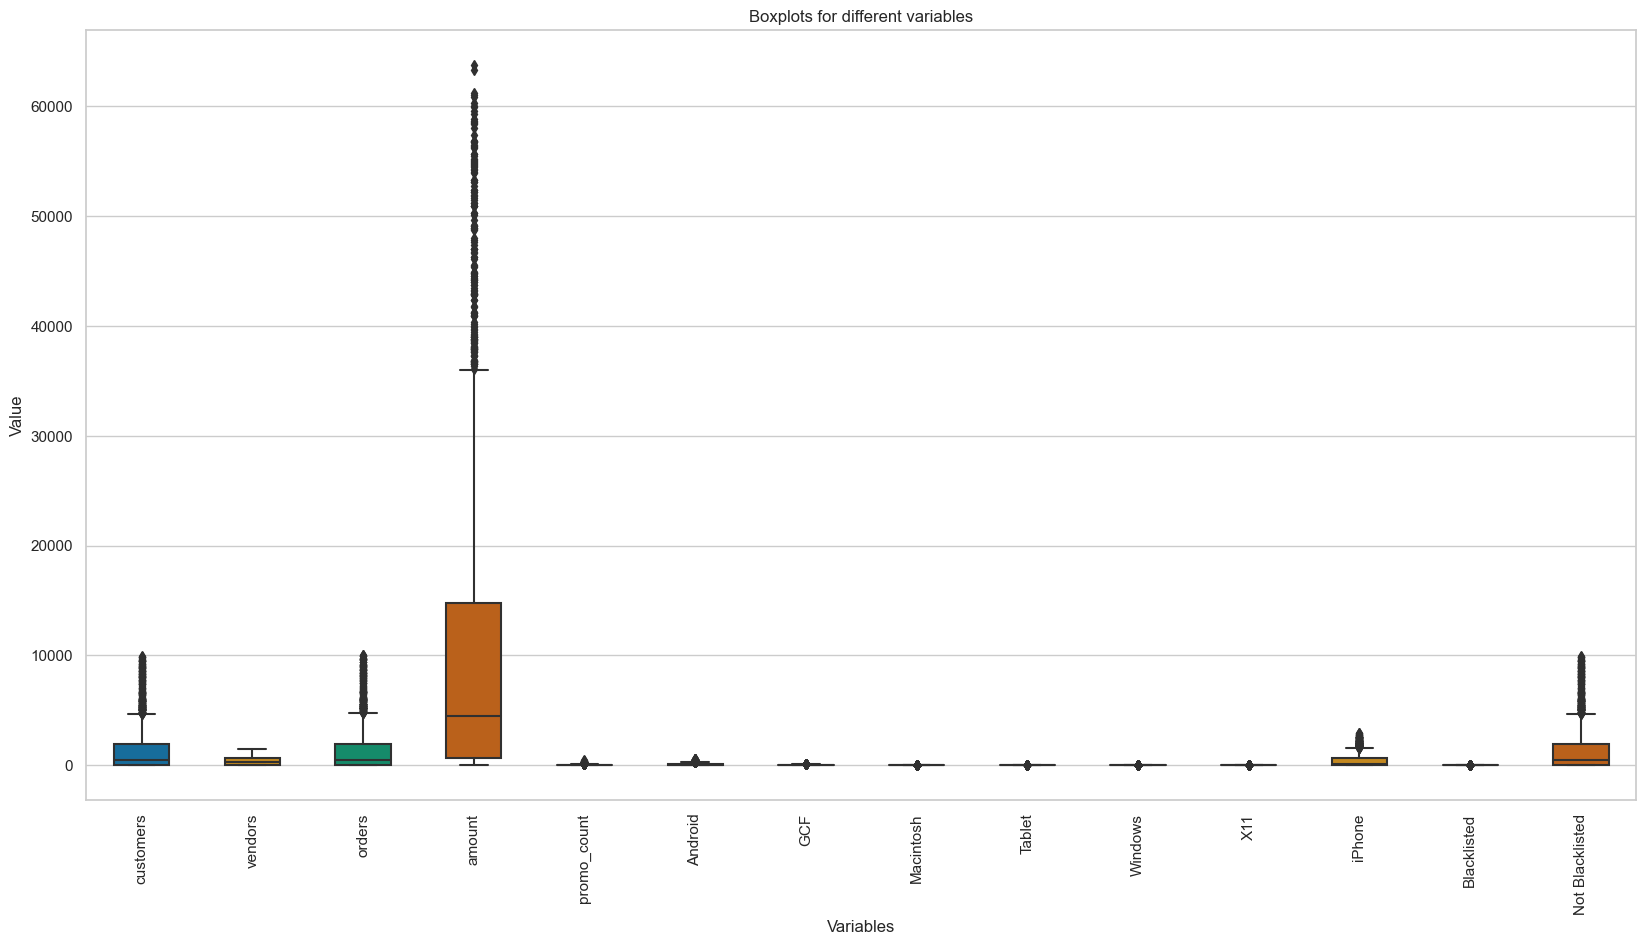

In [18]:
columns_to_plot = ['customers', 'vendors', 'orders', 'amount', 'promo_count',
                   'Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11',
                   'iPhone', 'Blacklisted', 'Not Blacklisted']


df_melted = df.melt(value_vars=columns_to_plot)
sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))

bplot=sns.boxplot(y='value', x='variable', 
                  data=df_melted, 
                  width=0.5,
                  palette="colorblind")


plt.title('Boxplots for different variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.show()

While analyzing promotional data, I came across several outliers across different metrics. It might be tempting to discard these as 'noise', but understanding their significance is vital.


1. Unusual but Informative
Outliers in 'promo_count' reveal a segment of customers who engage exceptionally with my promotions. Similarly, outliers in the 'amount' category signify customers making larger-than-average purchases. These outliers provide me with insights into unique customer behaviors that I may have otherwise missed.

2. Peaks of Activity
The outliers in the 'orders', and 'customers' categories represent unusually high traffic or sales days. These peaks in activity can shed light on the impact of certain promotions or events.

3. Device-Based Insights
Outliers in device-specific categories suggest that users on certain platforms are significantly more responsive to promotions. This could aid me in optimizing promotional strategies per platform.

4. Spotting Potential Red Flags
The outliers in the 'Blacklisted' column represent potentially problematic customers. These outliers can alert me to potential issues, such as promotional abuse.

Rather than removing these outliers, it's beneficial for me to investigate them further. They could be revealing unique customer segments, successful promotions, or potential issues. By including these outliers in my analysis, I ensure I'm getting the most comprehensive understanding of the promotional data, ultimately leading to more effective promo strategies.

### 1.  Show how promos affect business in different metrics

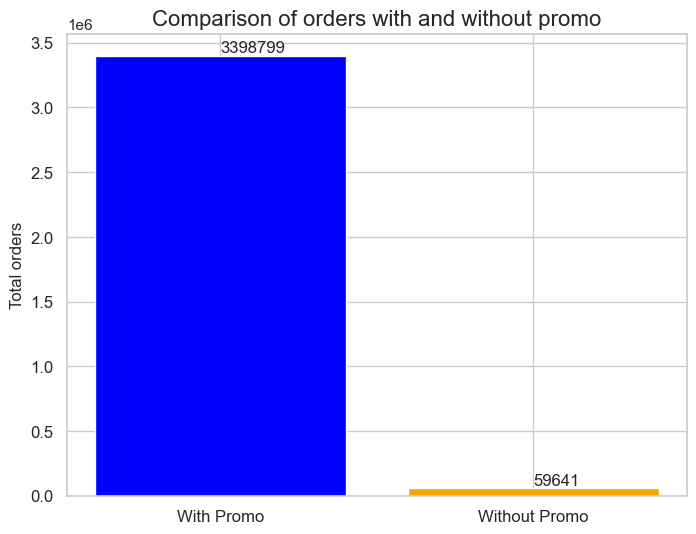

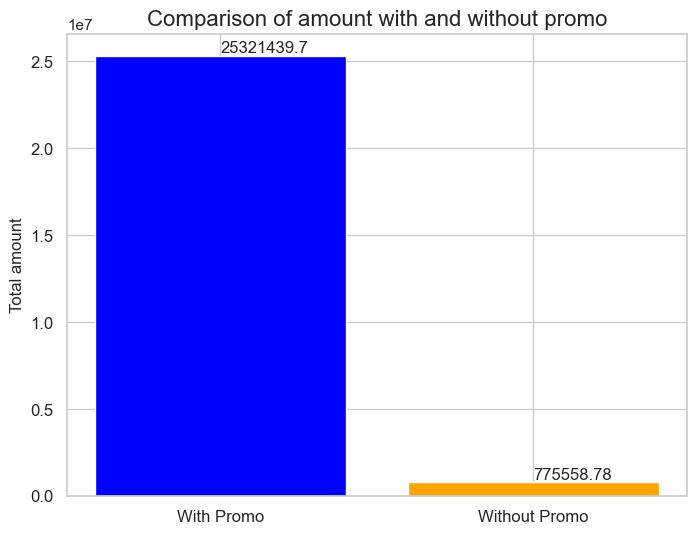

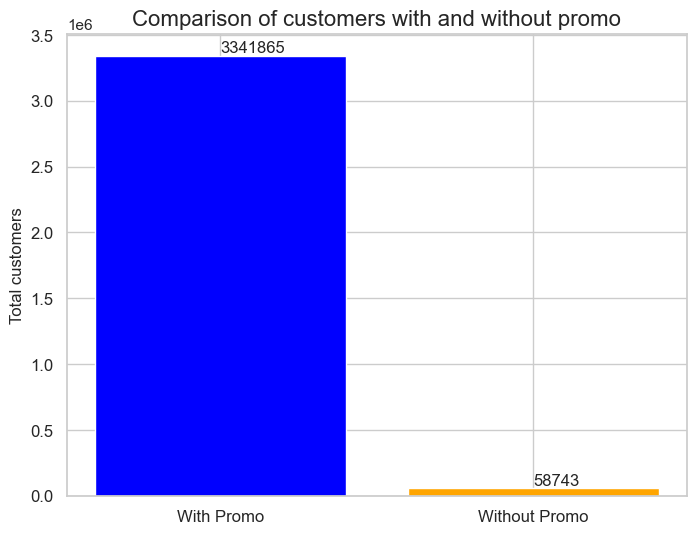

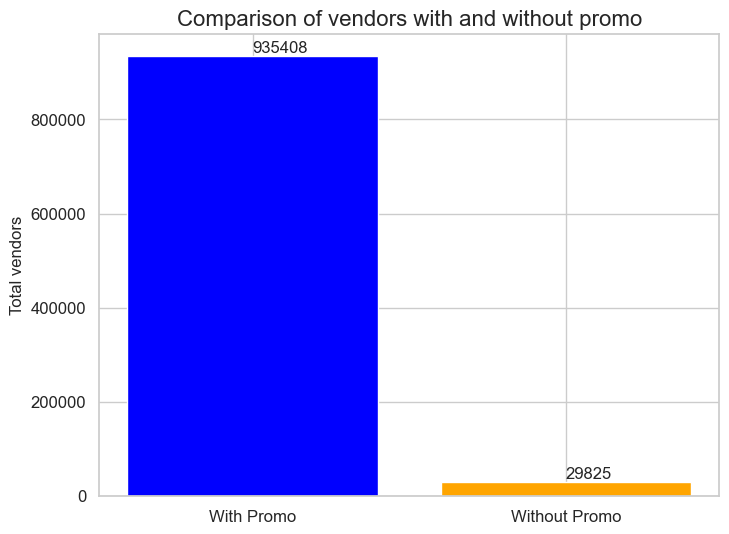

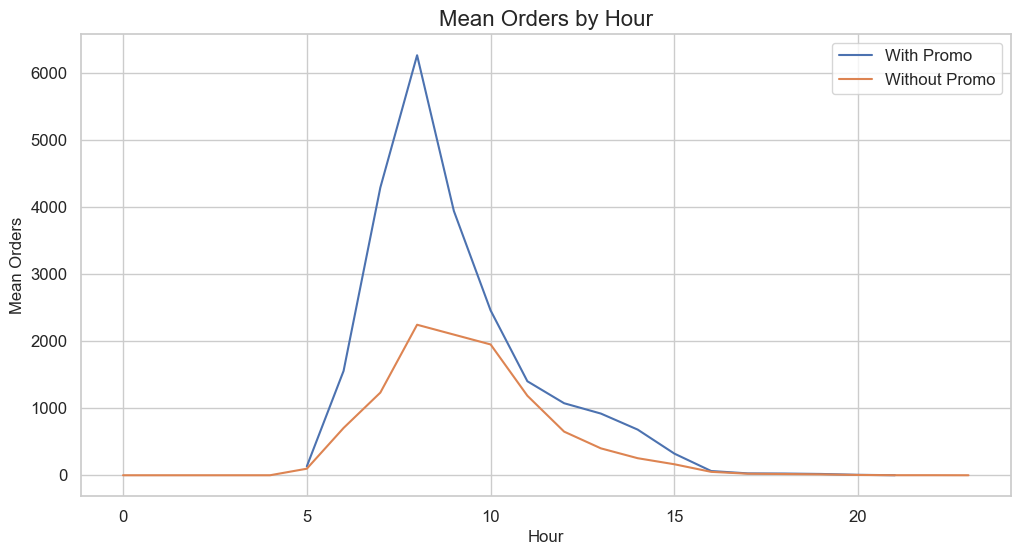

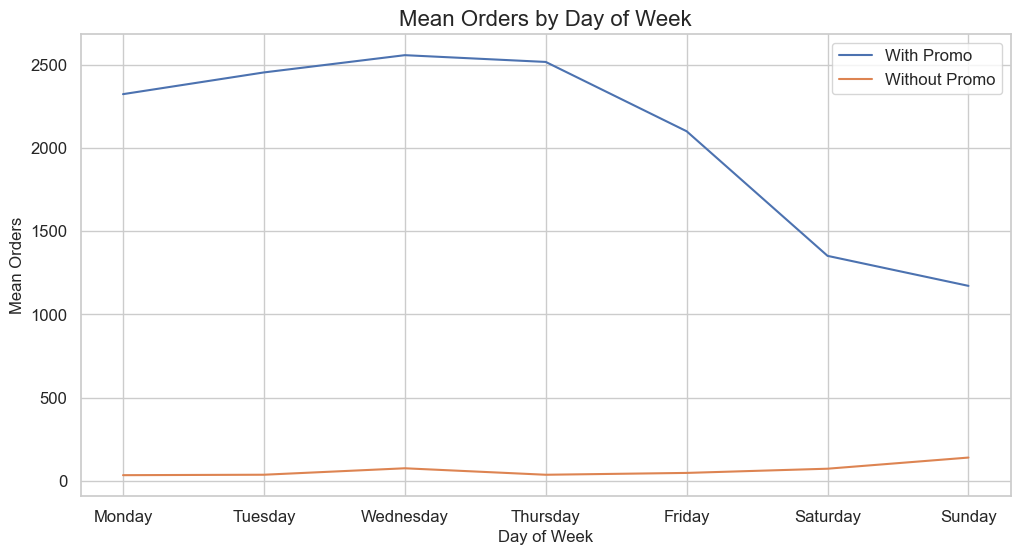

In [19]:
def create_bar_plot(metric):
    metric_with_promo = df[df['promo_count'] > 0][metric].sum()
    metric_without_promo = df[df['promo_count'] == 0][metric].sum()

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(['With Promo', 'Without Promo'], [metric_with_promo, metric_without_promo], color=['blue', 'orange'])
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') 

    ax.set_title(f'Comparison of {metric} with and without promo', fontsize=16)
    ax.set_ylabel(f'Total {metric}', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()


metrics = ['orders', 'amount', 'customers', 'vendors']

for metric in metrics:
    create_bar_plot(metric)



mean_orders_by_hour_with_promo = df[df['promo_count'] > 0].groupby('Hour')['orders'].mean()
mean_orders_by_hour_without_promo = df[df['promo_count'] == 0].groupby('Hour')['orders'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_orders_by_hour_with_promo.index, y=mean_orders_by_hour_with_promo.values, label='With Promo')
sns.lineplot(x=mean_orders_by_hour_without_promo.index, y=mean_orders_by_hour_without_promo.values, label='Without Promo')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Mean Orders', fontsize=12)
plt.title('Mean Orders by Hour', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

df['Day'] = pd.Categorical(df['Day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

mean_orders_by_day_with_promo = df[df['promo_count'] > 0].groupby('Day')['orders'].mean()
mean_orders_by_day_without_promo = df[df['promo_count'] == 0].groupby('Day')['orders'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_orders_by_day_with_promo.index, y=mean_orders_by_day_with_promo.values, label='With Promo')
sns.lineplot(x=mean_orders_by_day_without_promo.index, y=mean_orders_by_day_without_promo.values, label='Without Promo')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Mean Orders', fontsize=12)
plt.title('Mean Orders by Day of Week', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

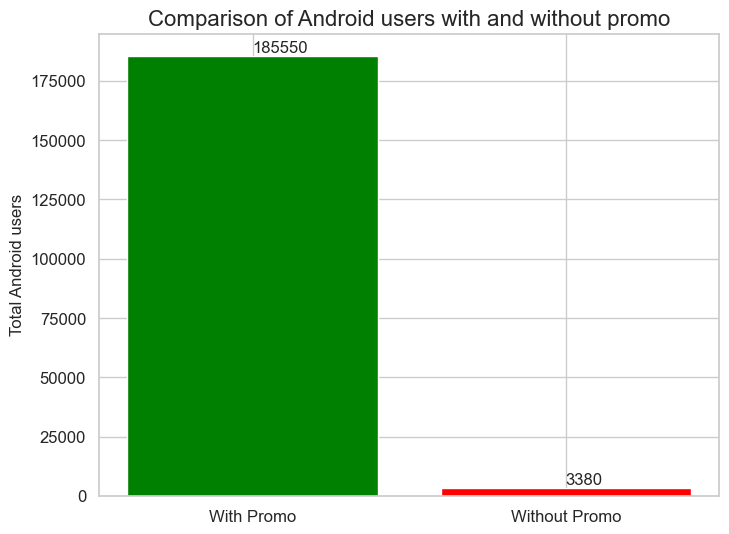

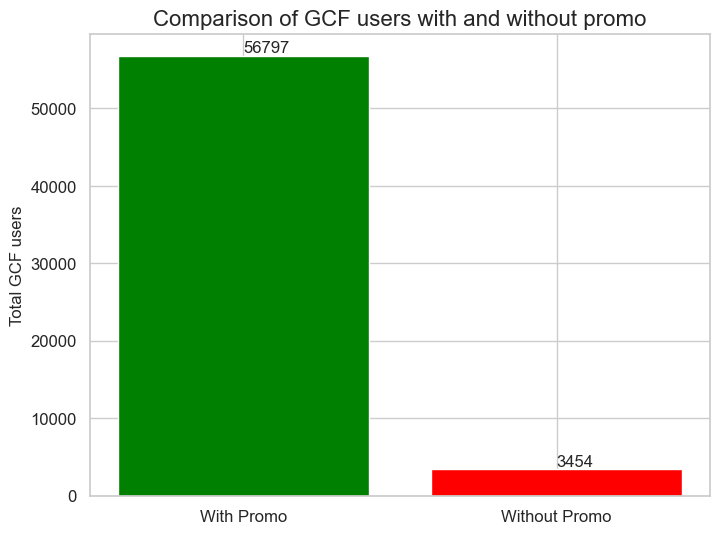

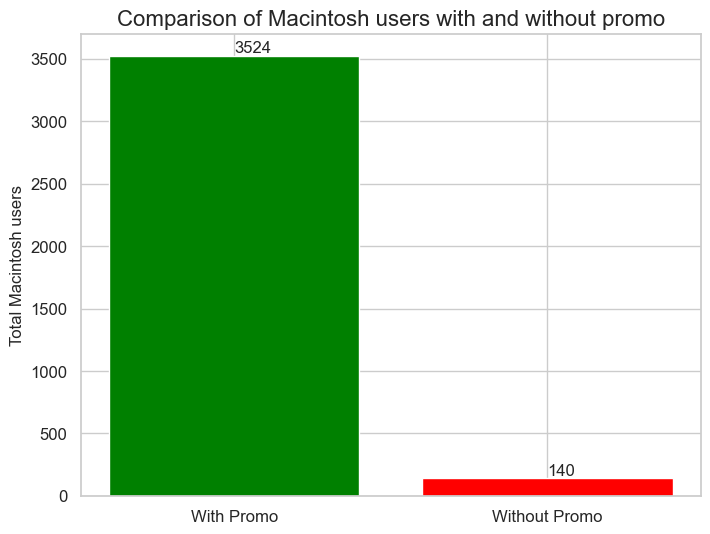

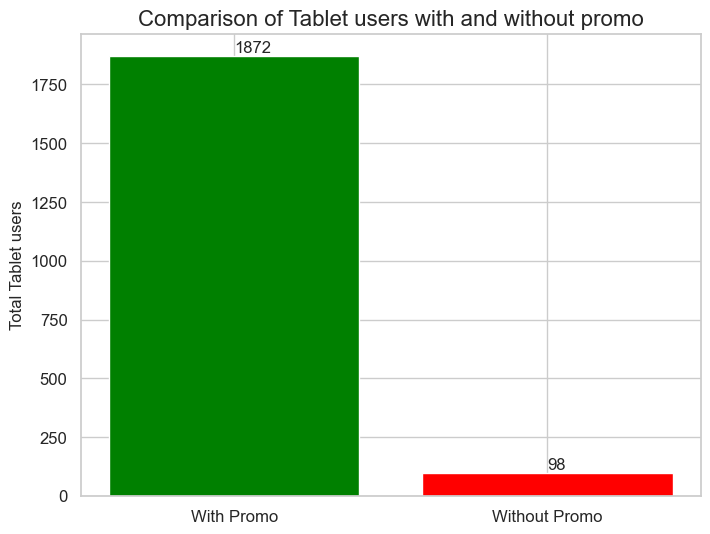

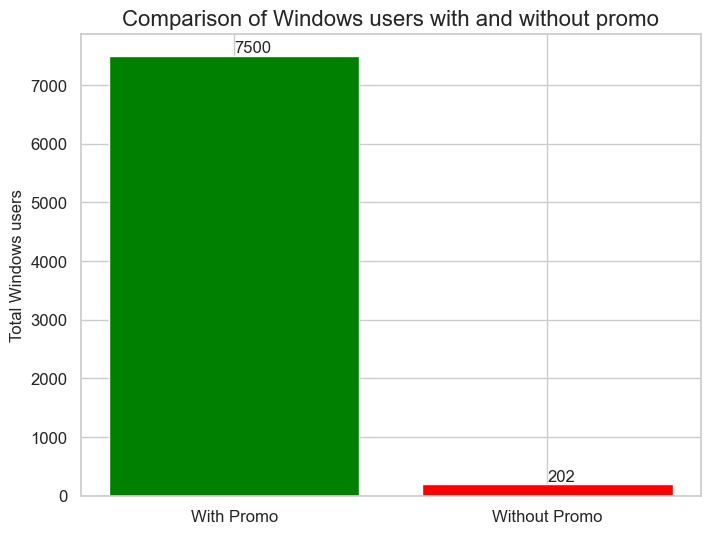

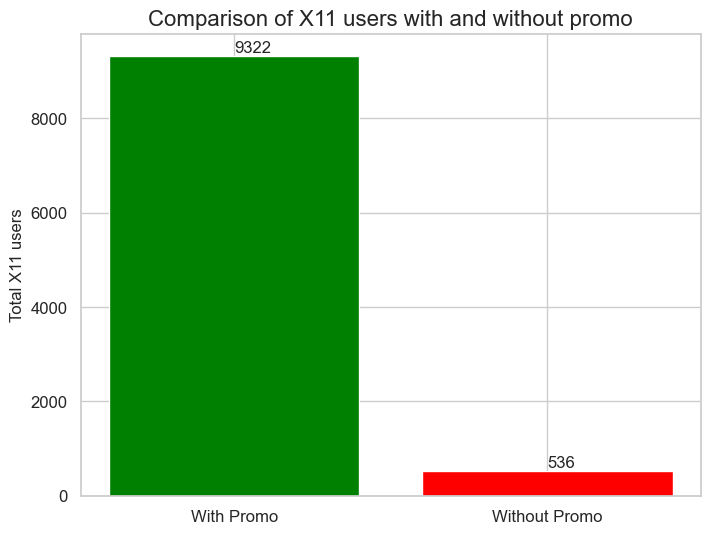

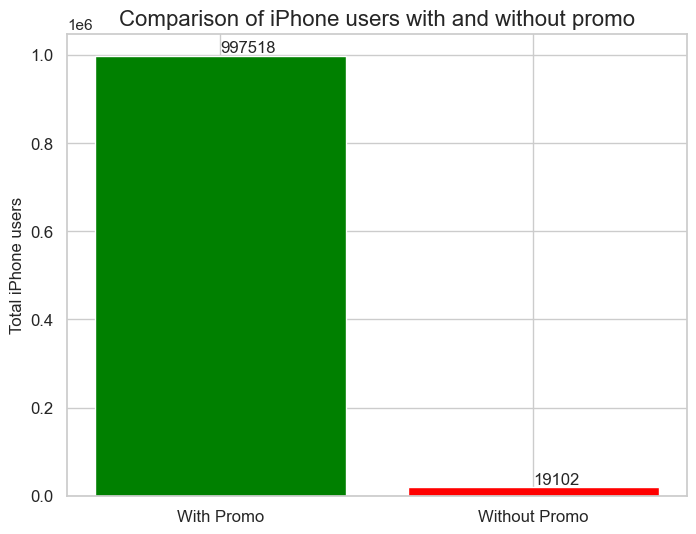

In [20]:
def create_device_bar_plot(device):
    device_users_with_promo = df[df['promo_count'] > 0][device].sum()
    device_users_without_promo = df[df['promo_count'] == 0][device].sum()

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(['With Promo', 'Without Promo'], [device_users_with_promo, device_users_without_promo], color=['green', 'red'])

    # Adding data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

    ax.set_title(f'Comparison of {device} users with and without promo', fontsize=16)
    ax.set_ylabel(f'Total {device} users', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

device_columns = ['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']

for device in device_columns:
    create_device_bar_plot(device)

In [21]:
data_summary = pd.DataFrame(columns=['Metric', 'With Promo', 'Without Promo'])

for metric in ['orders', 'amount', 'customers', 'vendors','Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']:
    with_promo = df[df['promo_count'] > 0][metric].sum()
    without_promo = df[df['promo_count'] == 0][metric].sum()
    data_summary = data_summary.append({'Metric': metric, 'With Promo': with_promo, 'Without Promo': without_promo}, ignore_index=True)


display(data_summary)

,Metric,With Promo,Without Promo
0,orders,3398799,59641
1,amount,25321439.7,775558.78
2,customers,3341865,58743
3,vendors,935408,29825
4,Android,185550,3380
5,GCF,56797,3454
6,Macintosh,3524,140
7,Tablet,1872,98
8,Windows,7500,202
9,X11,9322,536


### 2. Are promos helpful at all? Kindly justify in what situations is it good and/or bad.

Null Hypothesis (H0): There's no difference in the average order volume between promo and non-promo periods.


Alternative Hypothesis (H1): There's a significant difference in the average order volume between promo and non-promo periods.

In [22]:
from scipy import stats

def t_test(metric):
    # Subset the data into two groups
    group1 = df[df['promo_count'] > 0][metric]
    group2 = df[df['promo_count'] == 0][metric]

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)

    print(f'T-statistic for {metric}: {t_stat}')
    print(f'P-value for {metric}: {p_value}\n')

# Perform t-test on 'orders' metric
t_test('orders')

T-statistic for orders: 27.15797956573369
P-value for orders: 1.955935728248969e-142



The t-test conducted shows a t-statistic of 27.16 and a p-value close to zero (1.96e-142) for the 'orders' metric. This signifies a considerable difference in the average order volume during promotional and non-promotional periods. With such a negligible p-value, it's highly improbable that this difference occurred by chance. Consequently, we have strong statistical evidence suggesting that promotions substantially boost the order volume.

Promotions significantly increase our order volume, total revenue, customer base, and active vendors. These benefits span across different devices, times, and days. Key stats:

1. Promotional orders (3,398,799) dramatically outstrip non-promotional orders (59,641).
2. Revenue during promotions (AUD 25,321,439.70) also greatly surpasses non-promotional periods (AUD 775,558.78).
3. Customers and vendors participating during promotions (3,341,865 and 935,408 respectively) are far more than non-promotional periods (58,743 and 29,825 respectively).

However, we must consider potential issues such as reduced profitability due to discount costs and lack of customer loyalty without promotions. We need to strategize our promotions to ensure profitability, customer retention, and maintain reasonable order values. Further analysis is recommended, particularly at the customer level to understand long-term effects on behavior and profitability.

### 3. Along with your other findings, quantify/visualize and show the different customer profiles and their corresponding behavior. Better if you can identify segments.

#### a. Segment by Device:

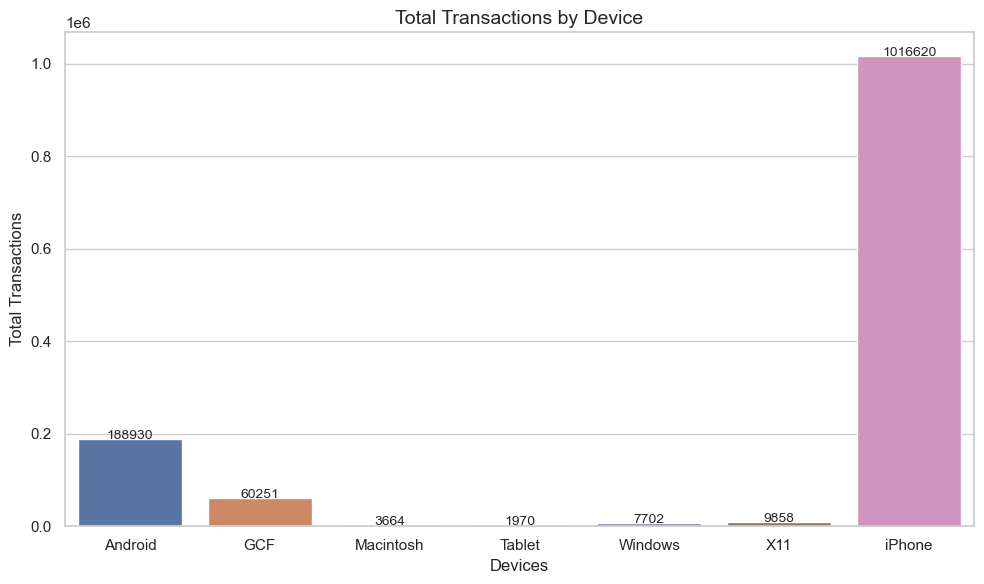

In [23]:
device_columns = ['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']
device_labels = ['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']
device_sum = df[device_columns].sum()


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=device_labels, y=device_sum, ax=ax)
ax.set_xlabel('Devices', fontsize=12)
ax.set_ylabel('Total Transactions', fontsize=12)
ax.set_title('Total Transactions by Device', fontsize=14)

for i, v in enumerate(device_sum):
    ax.text(i, v + 5, str(v), ha='center', fontsize=10)


plt.tight_layout()
plt.show()

Our data shows that device usage significantly impacts user engagement with our app.

The iPhone leads with approximately 1,016,620 transactions, indicating a strong user experience for this group, and we should maintain our high standards here.

However, Android users, contributing around 188,930 transactions, show room for growth, suggesting we need to enhance our app's user experience on this platform.

Transactions from Google Chrome Frame, although an obsolete plug-in, were around 60,251, warranting further study on this customer segment's needs and system compatibility.

Meanwhile, lower transactions from desktop platforms like Macintosh and Windows, as well as X11 and Tablets, suggest potential user experience issues or untapped customer bases. However, it may also reflect a general trend among our customers toward mobile device usage for accessing our app.

#### b. Segment by Time of Day:

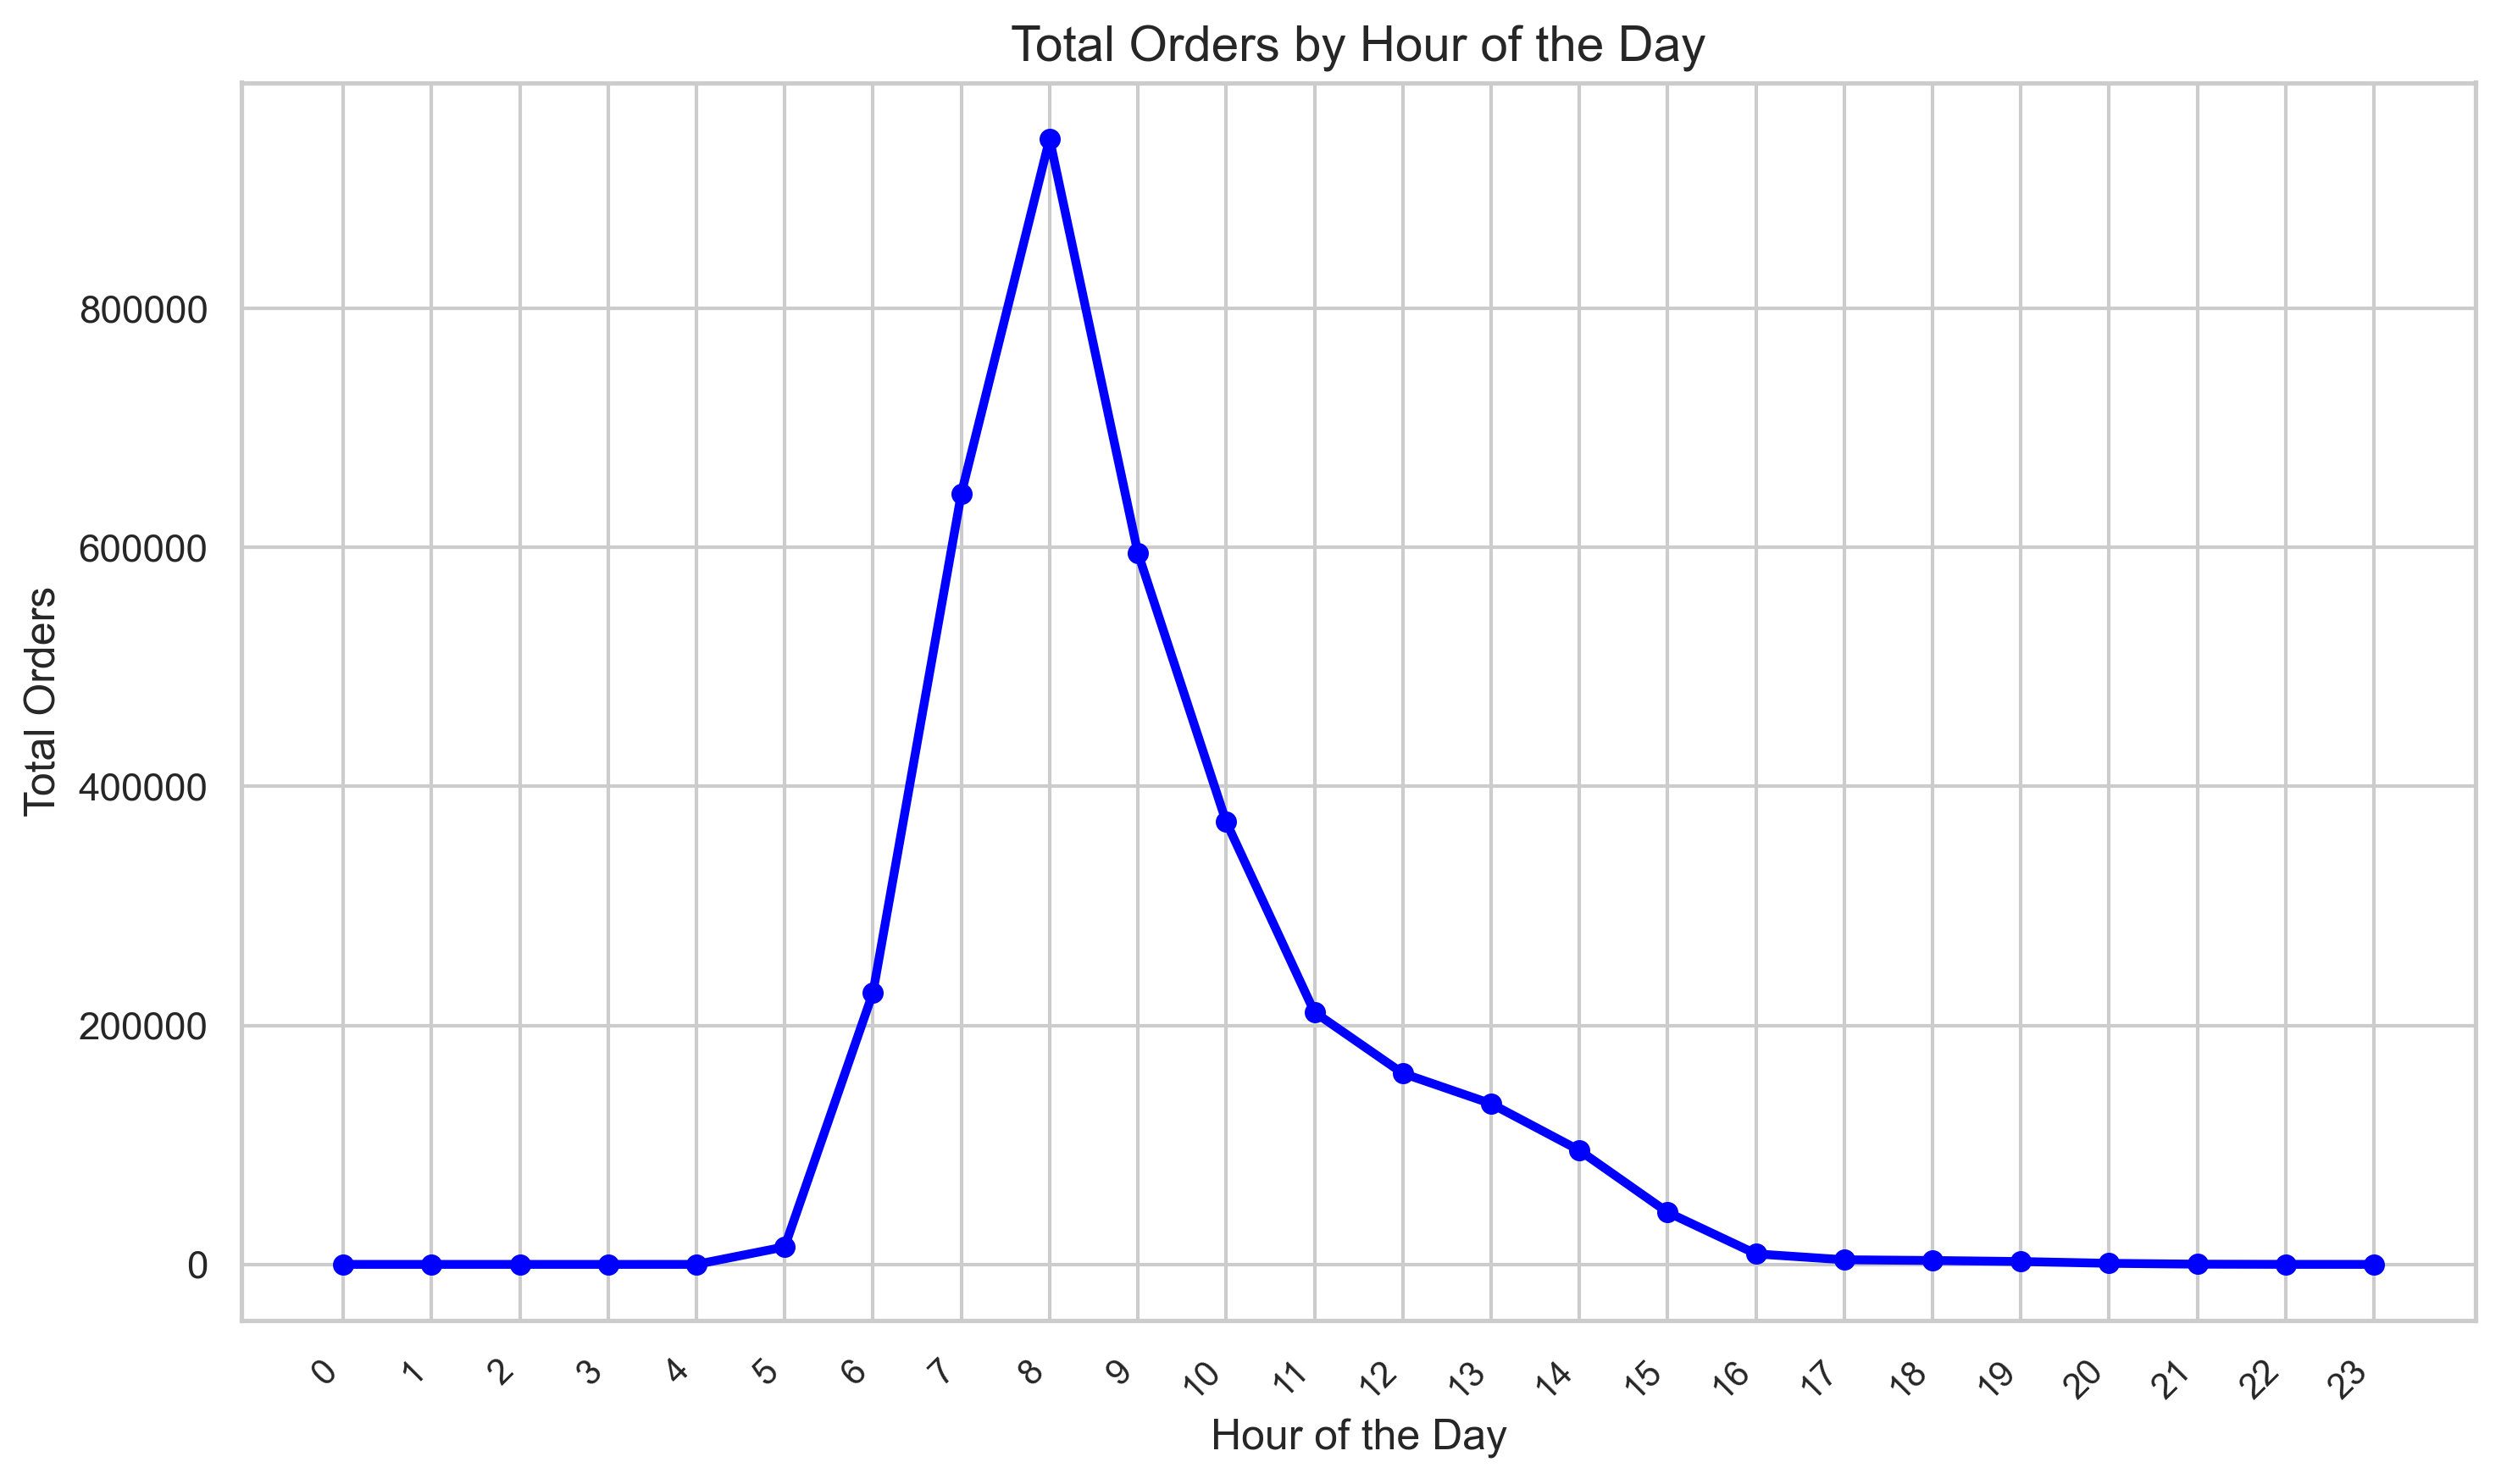

In [24]:
grouped_data = df.groupby('Hour')['orders'].sum()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

grouped_data.plot(kind='line', ax=ax, color='blue', linestyle='-',
                  linewidth=2.5, marker='o', markersize=5)

ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Total Orders', fontsize=12)
ax.set_title('Total Orders by Hour of the Day', fontsize=14)
ax.grid(True, axis='y')
ax.set_xticks(grouped_data.index)
ax.set_xticklabels(grouped_data.index, rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

Our transaction data reveals key customer behavior patterns. Activity surges from 6 AM, peaking at 8 AM with 941,821 transactions, likely due to morning commuters ordering breakfast or coffee. Transactions then decrease but remain significant around 9-10 AM, tapering off by mid-afternoon and staying low until late evening.

The lack of activity from 0 AM to 5 AM aligns with typical operating hours of cafes and QSRs. This suggests app usage is strongly tied to venue opening hours.

Key findings:

Morning hours see peak usage, indicating the app's frequent use for breakfast orders. We could use this insight to shape our marketing strategies, perhaps introducing targeted morning promotions.

Understanding these patterns can guide resource allocation, like customer service staffing during peak hours, or managing order flow with partner venues during busy periods.

Overall, analyzing transaction times can help us better cater to our customers' needs and improve their user experience.

#### c. Segment by Day of Week:

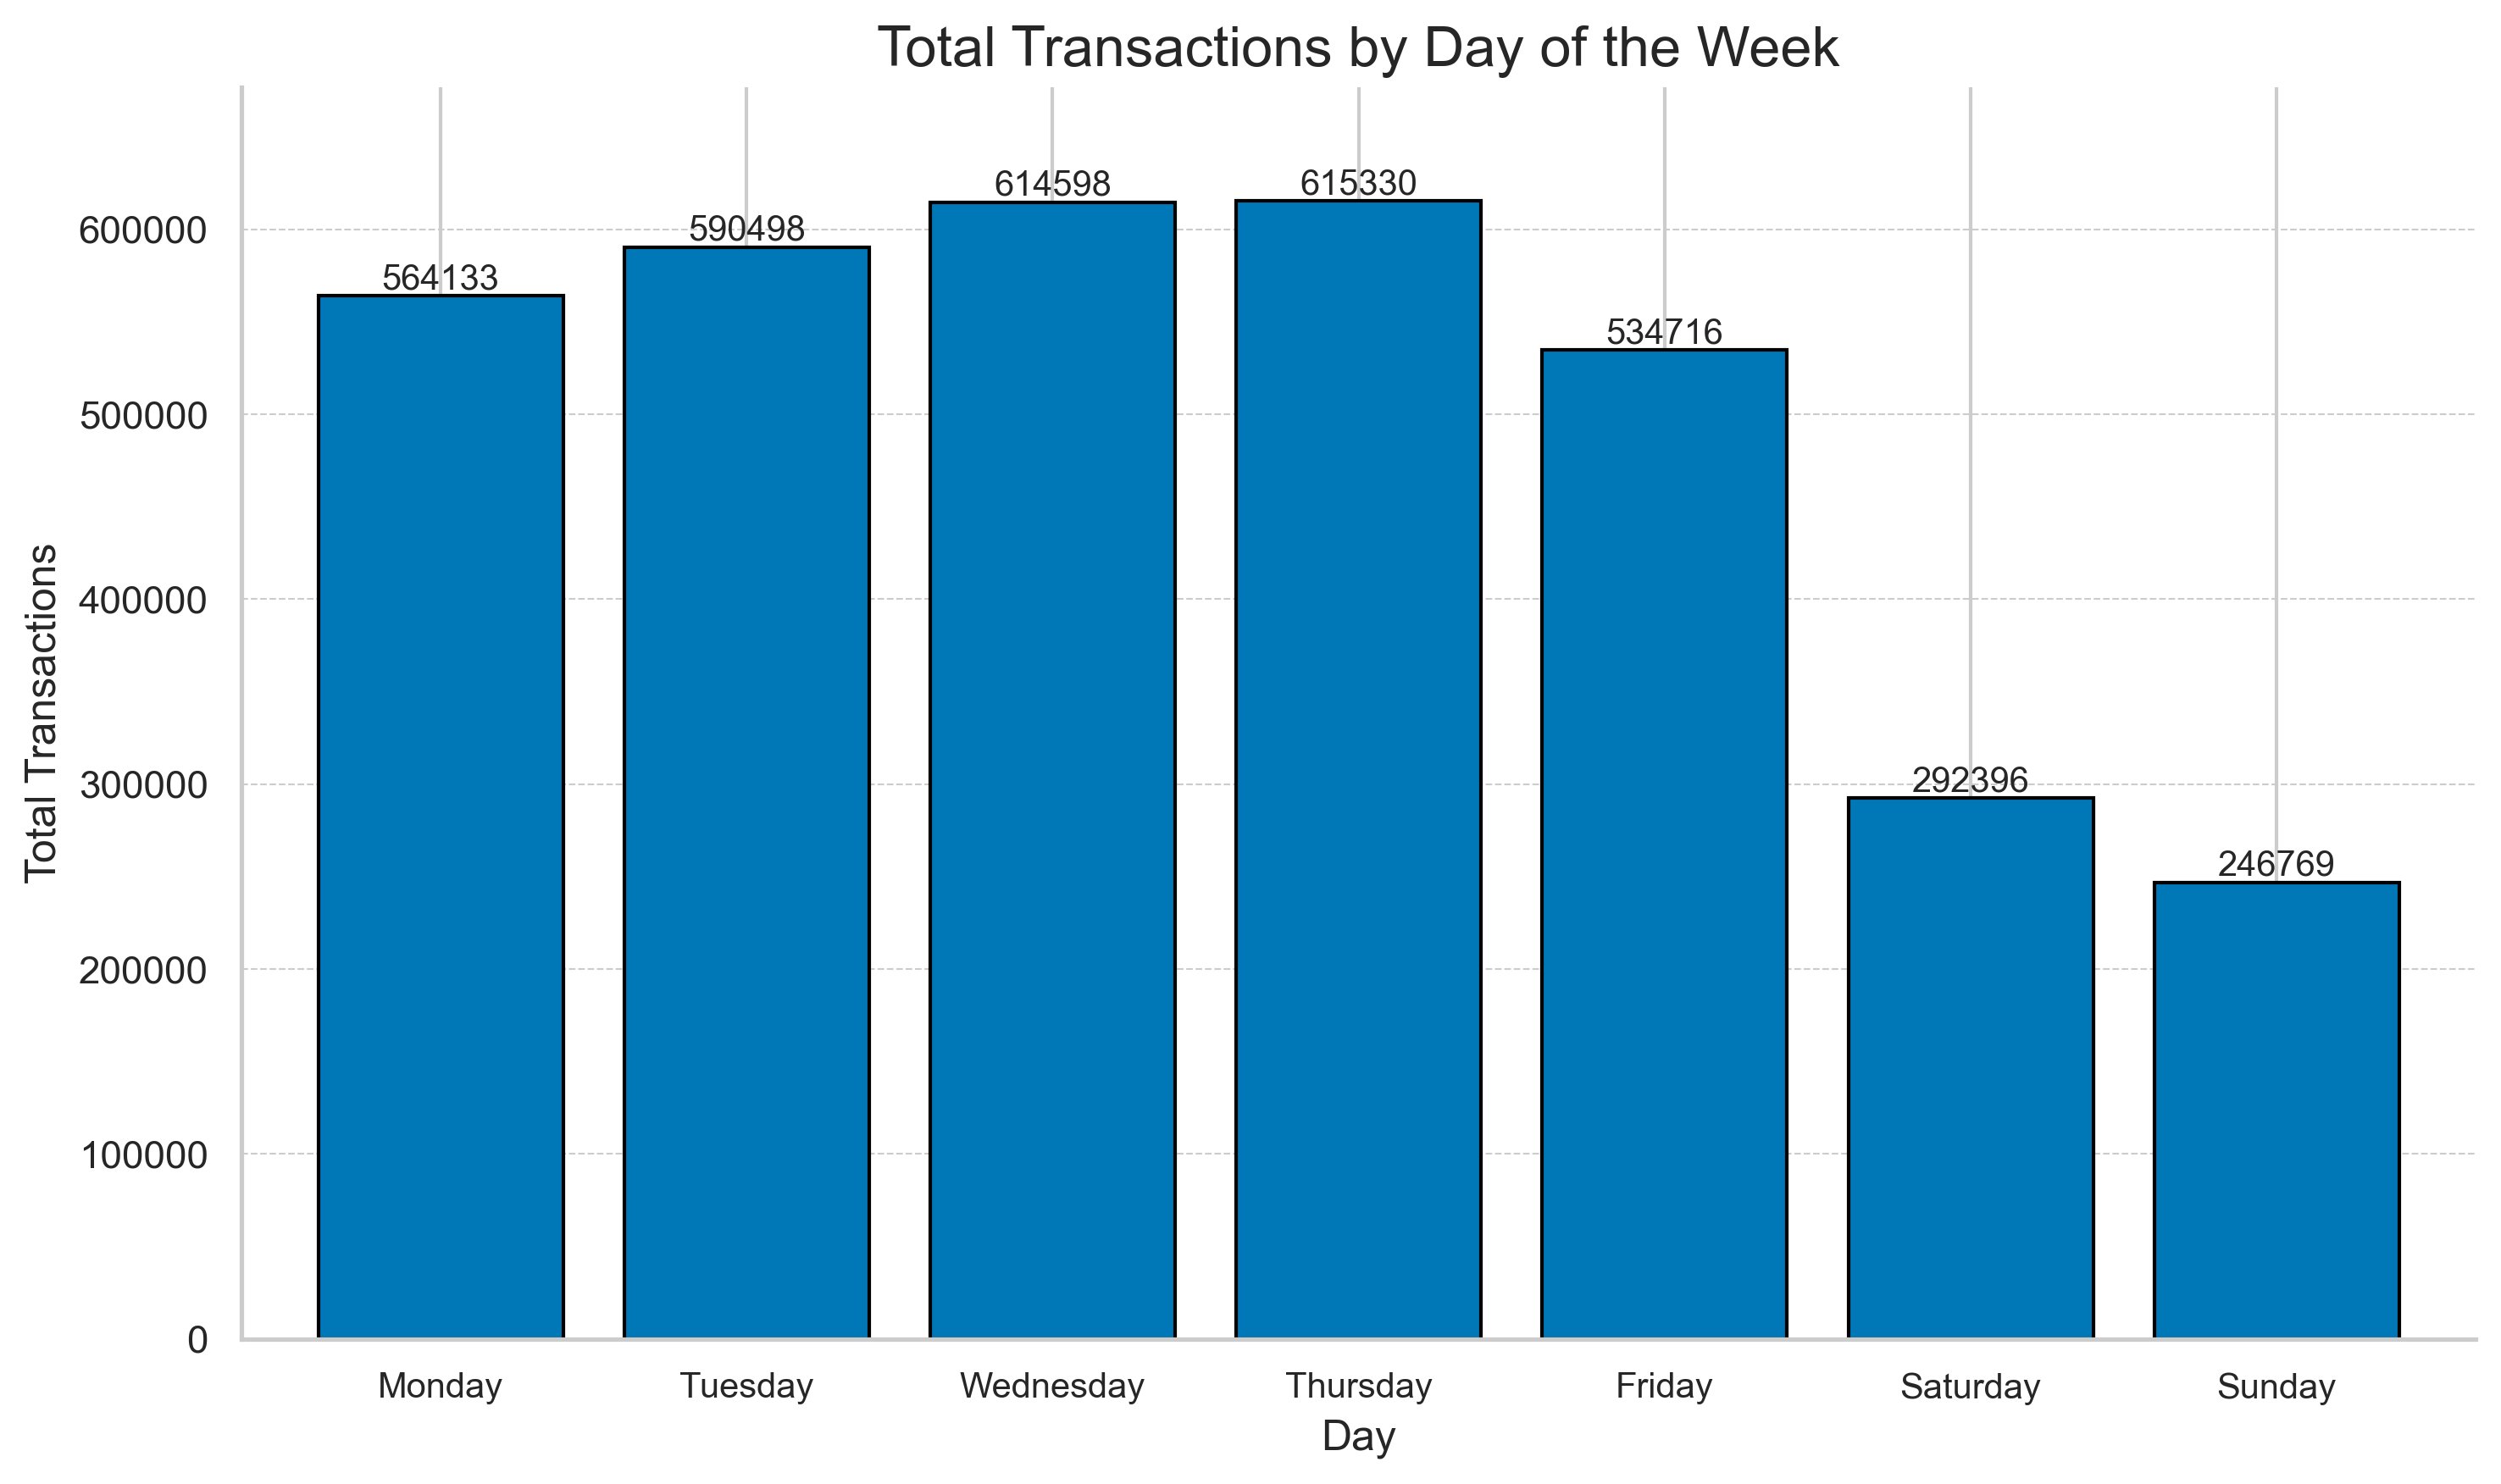

In [25]:
day_totals = df.groupby('Day')['orders'].sum()

plt.figure(figsize=(10, 6), dpi=300)

colors = ['#0077B6']

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_totals = day_totals.reindex(day_order) 
ax = day_totals.plot(kind='bar', color=colors, width=0.8, edgecolor='black')

plt.title('Total Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

for i, value in enumerate(day_totals):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', linewidth=0.5)  # Add a dashed grid


ax.set_xticklabels(day_totals.index, rotation=0, fontsize=10)


plt.ylim(0, day_totals.max() * 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Our transaction data across the week shows that customers predominantly use our service during mid-week, with Wednesday and Thursday each seeing over 600,000 transactions. This could be due to customers seeking convenience for meals during their workdays.

There's a drop in transactions on Friday, suggesting different dining habits nearing the weekend, and a further decrease over Saturday and Sunday, indicating less app reliance during weekends, potentially due to more leisurely meal times.

These patterns suggest:

We could focus marketing efforts on weekdays, considering special deals or offers for these high-activity days.

To stimulate weekend use, consider weekend-specific promotions or partnerships with venues popular for leisurely meals.

Understanding these weekly usage trends can help shape our business strategy, enhancing the user experience and potentially boosting app usage.

#### d. Segment by Promo Usage:

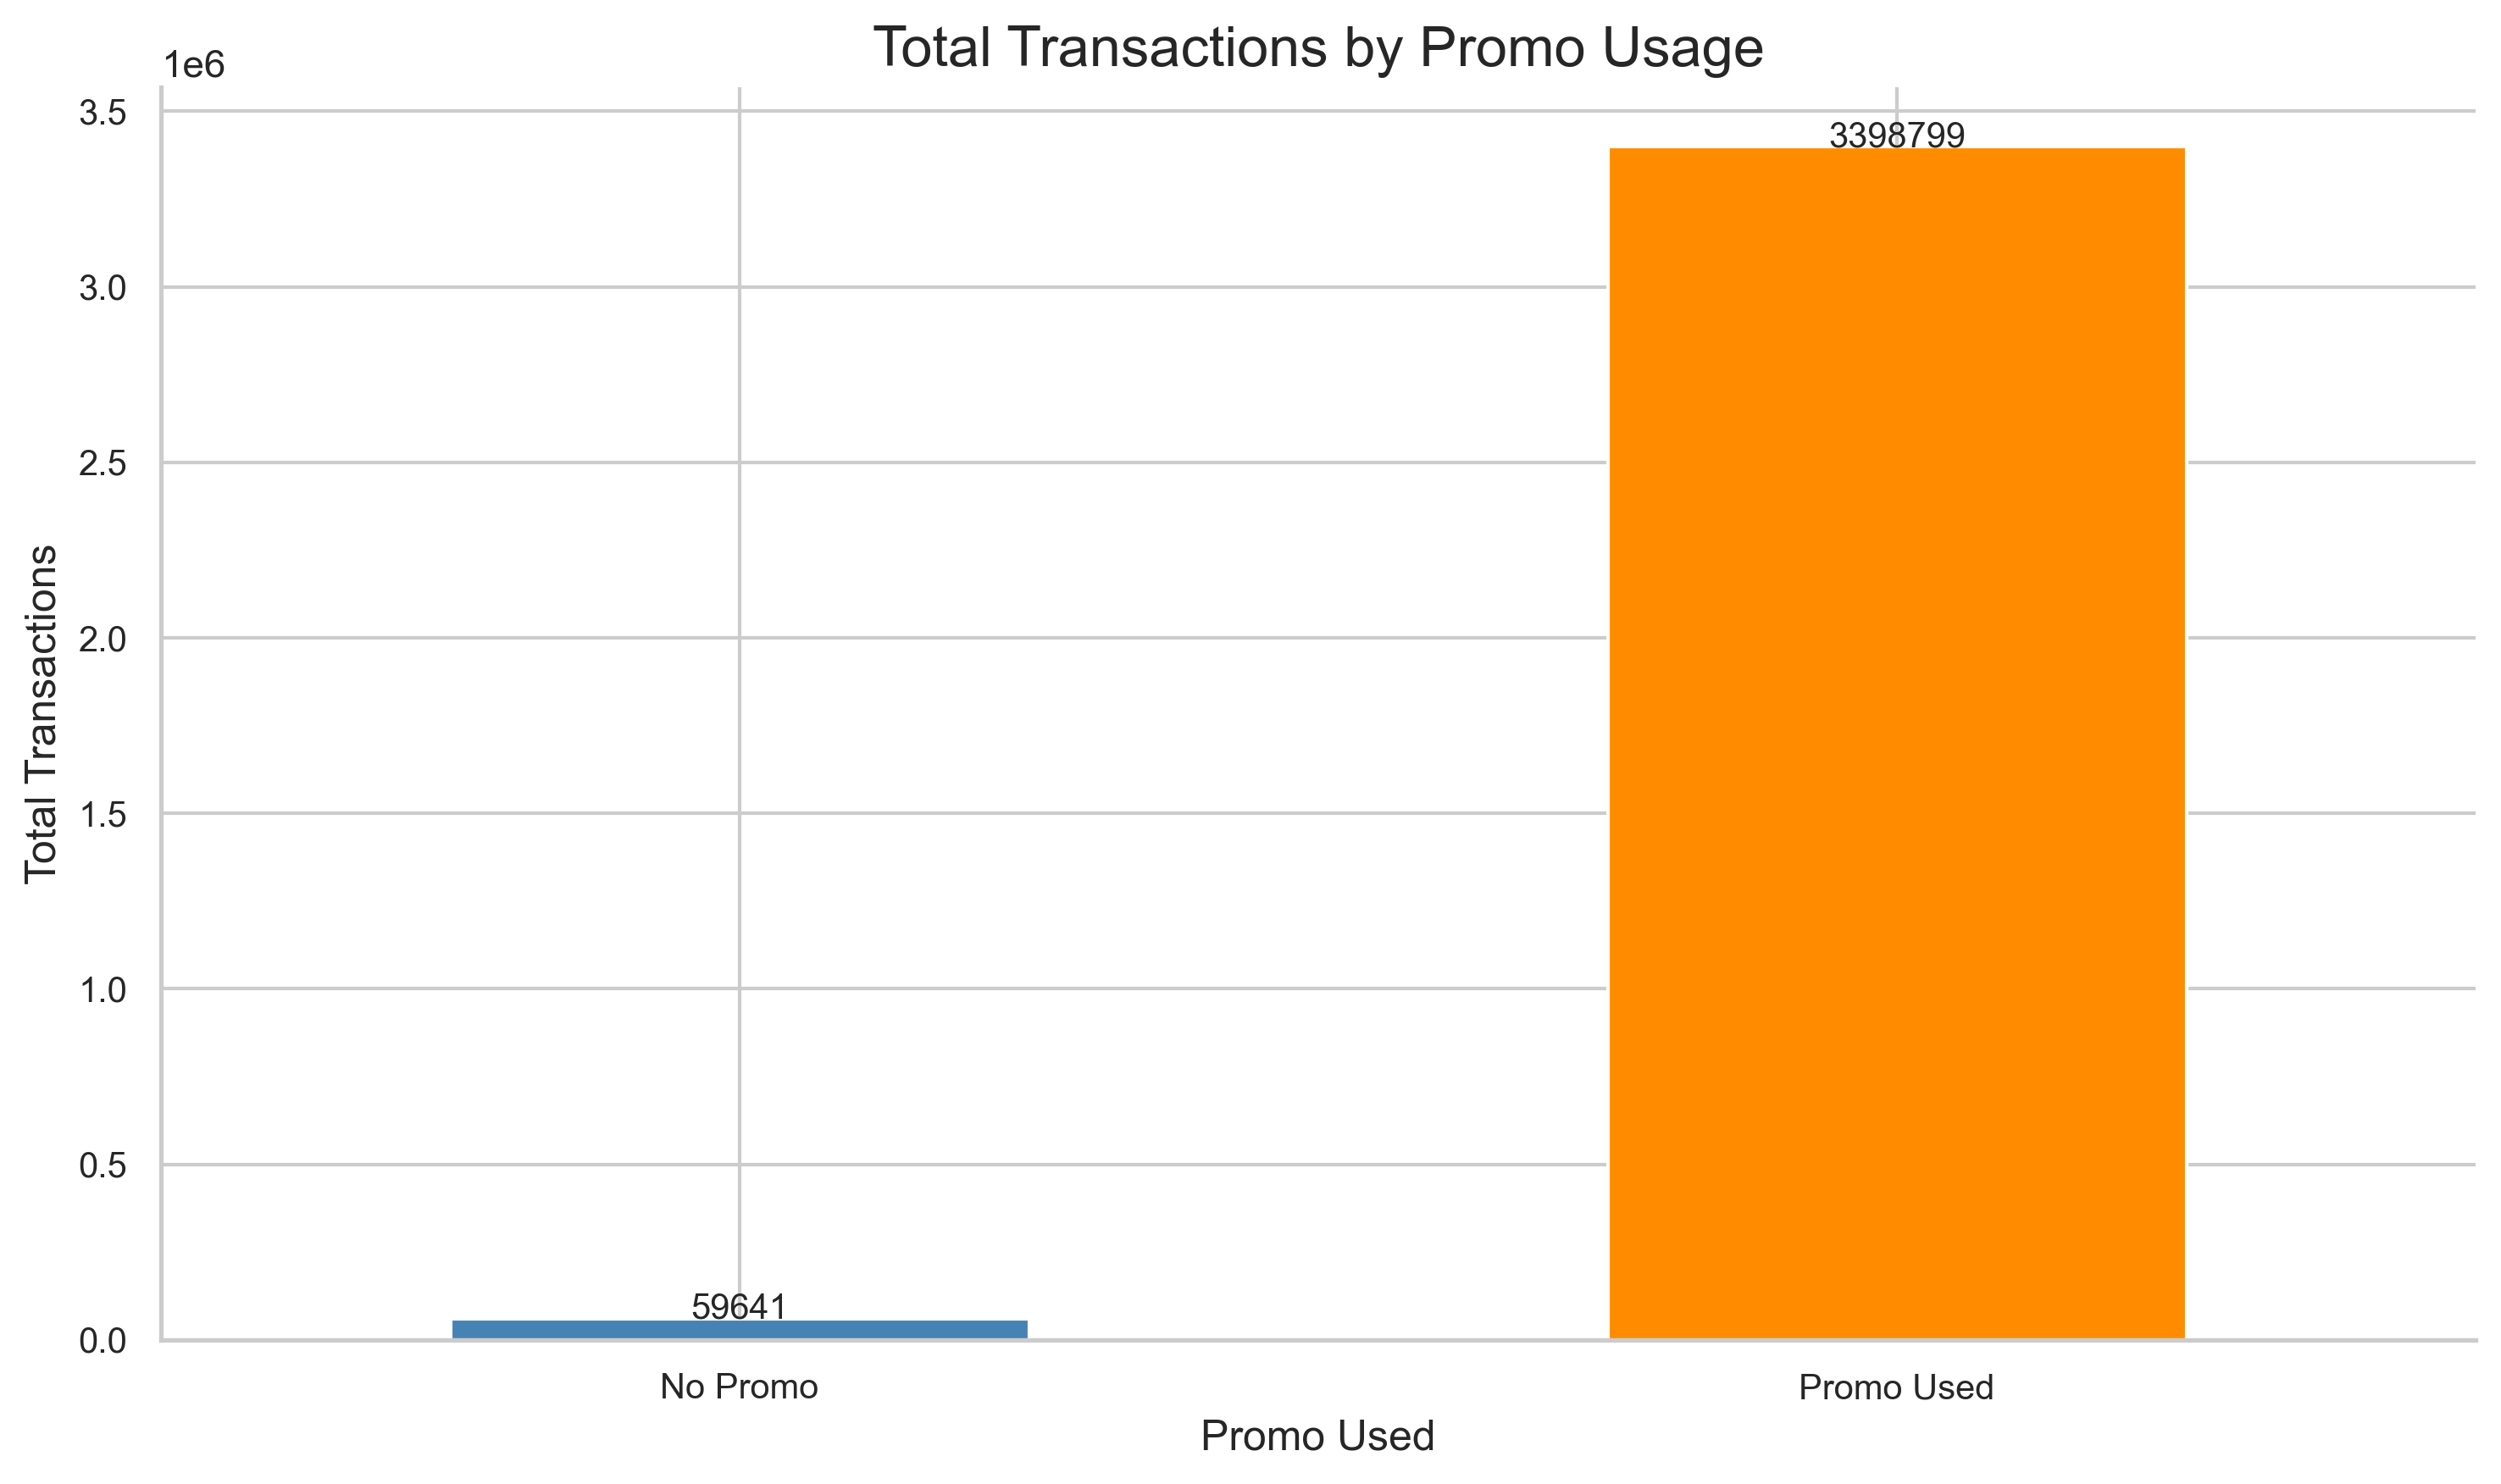

In [26]:
df['promo_used'] = df['promo_count'] > 0
promo_totals = df.groupby('promo_used')['orders'].sum()


fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
promo_totals.plot(kind='bar', color=['steelblue', 'darkorange'], ax=ax)
ax.set_title('Total Transactions by Promo Usage', fontsize=16)
ax.set_xlabel('Promo Used', fontsize=12)
ax.set_ylabel('Total Transactions', fontsize=12)
ax.set_xticklabels(['No Promo', 'Promo Used'], rotation=0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for i, v in enumerate(promo_totals):
    ax.text(i, v + 1000, str(v), ha='center', fontsize=10)


plt.tight_layout()
plt.show()

Our data indicates promotions significantly drive customer activity, with over 3.39 million orders associated with promotions compared to under 60,000 without. This implies customers are greatly incentivized by discounts or special deals.

Key insights and implications:

Promotions are a powerful tool to drive customer orders and could be further personalized based on user habits to boost engagement and order volumes.

We must assess the profitability of promotional orders, as they may impact profit margins despite driving order volume.

Increasing non-promotional transactions could involve enhancing platform features, improving user experience, or partnering with cafes and QSRs to offer exclusive app user benefits.

Understanding the role of promotions in customer behavior is crucial to our marketing and growth strategies.

#### d. Segment by Month

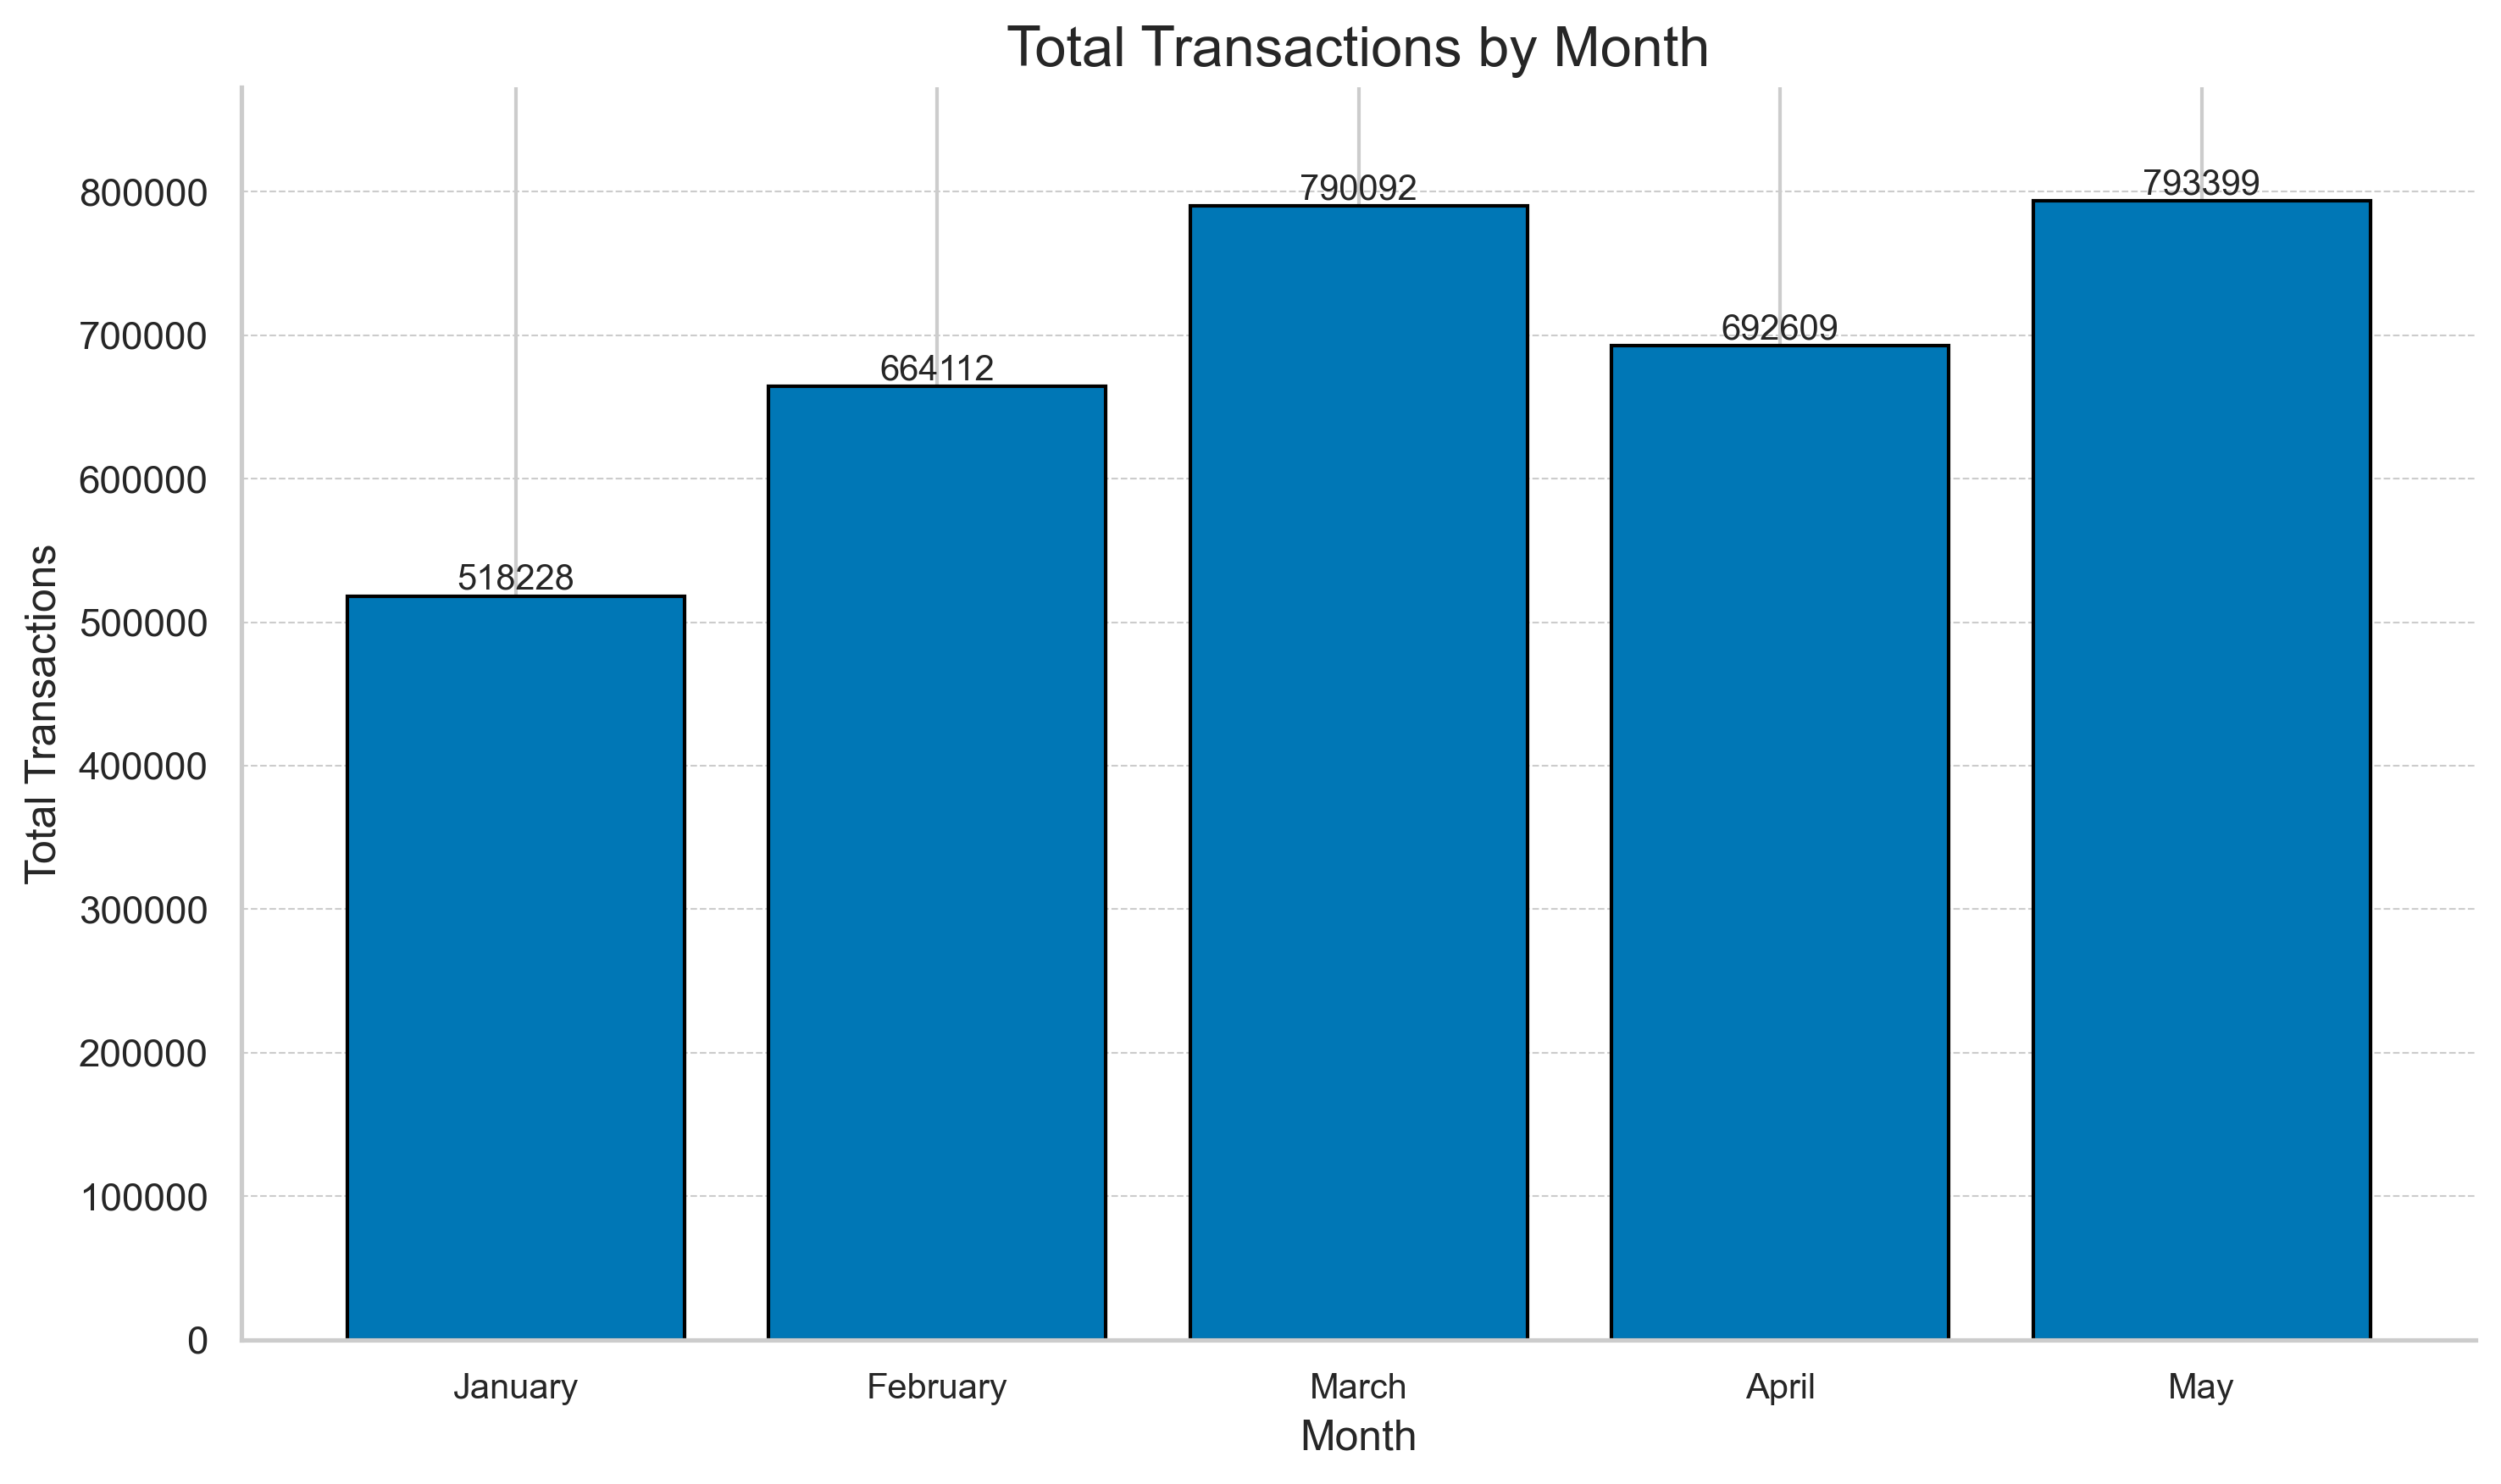

In [27]:
month_totals = df.groupby(df['Month'])['orders'].sum()

plt.figure(figsize=(10, 6), dpi=300)

colors = ['#0077B6']

month_order = ['January', 'February', 'March', 'April', 'May']

month_totals = month_totals.reindex(month_order) 
ax = month_totals.plot(kind='bar', color=colors, width=0.8, edgecolor='black')

plt.title('Total Transactions by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

for i, value in enumerate(month_totals):
    ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.set_xticklabels(month_totals.index, rotation=0, fontsize=10)
plt.ylim(0, month_totals.max() * 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Our app's monthly order data indicates consistent growth and high customer engagement. From 518,228 orders in January, we experienced a steady increase, peaking at 793,399 orders in May. Despite a slight dip in April, the overall upward trend demonstrates our app's effectiveness in providing a seamless, convenient ordering service.

### Additional Insights

1. Regression Analysis

a. Impact of Promo on No. of Orders

In [28]:
import statsmodels.api as sm

X = df['promo_count']
y = df['orders']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     7358.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:44   Log-Likelihood:                -20746.
No. Observations:                2485   AIC:                         4.150e+04
Df Residuals:                    2483   BIC:                         4.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         415.1642     23.461     17.696      

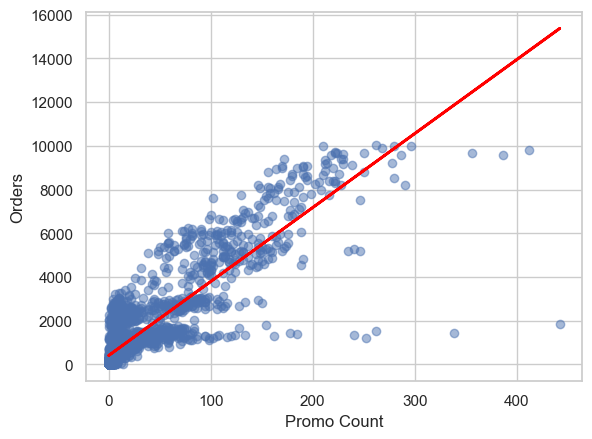

In [29]:
X = df['promo_count']
y = df['orders']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
predictions = results.predict(X)
X_values = X.to_numpy()[:, 1]
y_values = y.to_numpy()
plt.scatter(X_values, y_values, alpha=0.5, label='Actual')
plt.plot(X_values, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Promo Count')
plt.ylabel('Orders')
plt.show()

My data analysis indicates a strong correlation between the number of promotions used and the number of orders placed. Specifically, each additional promotion used increases orders by an average of 33.84. This strong relationship, backed by a statistically significant p-value of 0.00, underscores promotions' critical role in driving order volume. However, it's worth noting that even without promotions, we see a baseline of approximately 415 orders, highlighting other contributing factors to customer ordering behavior.

b. Impact of Promo on No. of Customers

In [30]:
X = df['promo_count']
y = df['customers']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              customers   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     7341.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:44   Log-Likelihood:                -20710.
No. Observations:                2485   AIC:                         4.142e+04
Df Residuals:                    2483   BIC:                         4.144e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         407.1839     23.122     17.611      

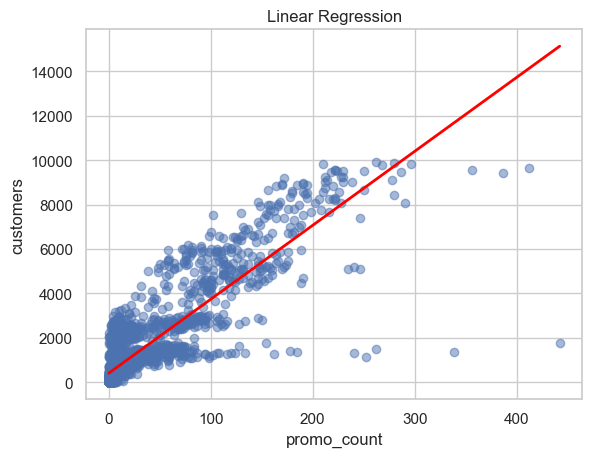

In [31]:
plt.scatter(df['promo_count'], df['customers'], alpha=0.5)
plt.xlabel('promo_count')
plt.ylabel('customers')
x_line = np.linspace(df['promo_count'].min(), df['promo_count'].max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = results.predict(x_line_const)
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.title('Linear Regression')
plt.show()

My data analysis reveals a robust correlation between the usage of promotions and customer count. Specifically, each additional promotion correlates with an average increase of 33.31 customers. This significant relationship, evidenced by a p-value of 0.00, emphasizes the impact of promotions in attracting customers. However, even without promotions, we see a baseline of roughly 407 customers, indicating other influencing factors in a customer's decision to engage with the business.

c. Impact of Promo on Amount(Sales)

In [32]:
X = df[['promo_count']]
y = df['amount']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5308.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:45   Log-Likelihood:                -25725.
No. Observations:                2485   AIC:                         5.145e+04
Df Residuals:                    2483   BIC:                         5.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4351.3178    173.974     25.011      

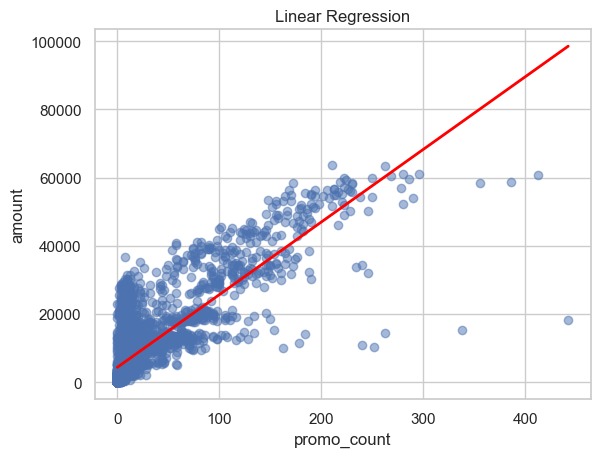

In [33]:
plt.scatter(df['promo_count'], df['amount'], alpha=0.5)
plt.xlabel('promo_count')
plt.ylabel('amount')
x_line = np.linspace(df['promo_count'].min(), df['promo_count'].max(), 100)
x_line_const = sm.add_constant(x_line)
y_line = results.predict(x_line_const)
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.title('Linear Regression')
plt.show()

My analysis reveals a significant relationship between the use of promotions and customer spend. Specifically, each additional promotion is associated with an average increase in spending by about 213.13. This highlights the influential role of promotions in boosting customer spending. Nevertheless, we observe a baseline spending of approximately 4351.32, even without promotions, indicating other factors contribute to customer spending behavior as well.

## BUSINESS METRICS

1. Monthly Order Volume Growth Rate:

This metric will help the business monitor how fast the number of orders placed through the app is growing on a monthly basis.

Initial values for the metric (based on the provided data):

January to February growth rate: ((664,112 - 518,228) / 518,228) * 100 = 28.14%

February to March growth rate: ((790,092 - 664,112) / 664,112) * 100 = 18.95%

March to April growth rate: ((692,609 - 790,092) / 790,092) * 100 = -12.34%

April to May growth rate: ((793,399 - 692,609) / 692,609) * 100 = 14.56%

These initial values show that our monthly order volume has generally been growing, apart from a decrease from March to April.


2. Customer Growth per Promotion:

This metric measures how effectively our promotions are in attracting more customers.

Based on the regression analysis, for each additional promotion used, we can expect around 33 more customers. This can be represented as a growth rate of:

(Customer growth per promotion / Base number of customers without promotion) * 100 = (33 / 407) * 100 = 8.11%

This shows that each promotion can increase our customer base by around 8.11%.

3. Order Growth per Promotion:

This metric measures the effectiveness of our promotions in driving more orders.

Based on the regression analysis, for each additional promotion used, we can expect around 34 more orders. This can be represented as a growth rate of:

(Order growth per promotion / Base number of orders without promotion) * 100 = (34 / 415) * 100 = 8.19%

This shows that each promotion can increase our order volume by around 8.19%.

4. Average Spending Increase per Promotion:

This metric assesses how promotions influence customer spending.

From the regression analysis, we found that for each additional promotion used, the amount spent increases by approximately $213.13. This can be expressed as a growth rate of:

(Average spending increase per promotion / Base spending without promotion) * 100 = (213.13 / 4351.32) * 100 = 4.90%

This suggests that each promotion can increase customer spending by around 4.90%.

## CONCLUSION

After conducting a comprehensive analysis of our platform's data, I have identified key factors that significantly shape customer behavior and influence transaction volumes.

1. Device Usage: A large portion of our customers transact using iPhones, followed by Android and other devices. This underlines the importance of ensuring seamless user experiences across all devices, particularly Android, where we may be able to capture a larger user base.

2. Time of Ordering: I noticed clear patterns in ordering behavior in relation to the time of day and day of the week. Peak usage occurs during morning hours, around 8 AM, and in the mid-week period. This insight aligns with typical work and school routines and indicates when we should focus our resources to accommodate high demand.

3. Promotional Influence: Promotions have a pivotal role in driving customer activity on our platform. A significant majority of transactions occur with promotional incentives, emphasizing their value in stimulating customer engagement and sales.

4. Growth and Promotion Impact: Our order volume has seen a general monthly growth trend, highlighting a consistent customer engagement. Moreover, each additional promotion tends to increase our customer base by around 8.11%, order volume by 8.19%, and customer spending by roughly 4.90%. This further illustrates the power of promotions in driving business metrics.

5. Variability in Customer Traffic and Sales: The analysis also reveals significant fluctuations in customer traffic and order volumes, with certain times experiencing exceptionally high customer activity. This informs our resource management, staffing strategies, and the timing of promotional campaigns.

In conclusion, maintaining a high-quality user experience across all devices, effectively managing resources based on peak demand times, and strategically utilizing promotions are pivotal for our business growth. Regular monitoring of our proposed business metrics can provide ongoing performance feedback and inform future strategies.

## RECOMMENDATION

1. Device Optimization: Prioritize technical improvements on Android and ensure the platform is compatible with a wide range of devices to reach a broader audience.

2. Promotion Strategy: Considering the high response to promotions, continue to leverage them while ensuring they are profitable. To balance the large volume of promotional orders, work on strategies to increase non-promotional transactions, like enhancing user experience or offering exclusive benefits.

3. Marketing Strategy: Develop marketing strategies that align with customer behavior. For instance, focus on morning and mid-week promotions when the usage is at its peak. On weekends, consider strategies that encourage app use like special weekend deals or brunch promotions.

4. Customer Retention: While promotions attract new customers, a customer loyalty program can help retain customers even when there are no promotions. Consider implementing such a program to increase long-term customer value.

5. Further Analysis: To understand long-term effects of promotions, and to maintain a customer-centric approach, continue analyzing customer-level data over time. Explore other data points such as customer demographics, order sizes, frequency of orders, etc. to tailor promotions, marketing efforts, and the overall customer experience.